In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA

In [46]:
data = pd.read_csv('penbased-5an-nn.csv')
data.head()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0,1
0,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
1,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
2,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
3,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7
4,29,91,6,57,66,39,30,0,81,19,3,72,39,97,100,100,5


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10991 non-null  int64
 1    57     10991 non-null  int64
 2    31     10991 non-null  int64
 3    68     10991 non-null  int64
 4    72     10991 non-null  int64
 5    90     10991 non-null  int64
 6    100    10991 non-null  int64
 7    100.1  10991 non-null  int64
 8    76     10991 non-null  int64
 9    75     10991 non-null  int64
 10   50     10991 non-null  int64
 11   51     10991 non-null  int64
 12   28     10991 non-null  int64
 13   25     10991 non-null  int64
 14   16     10991 non-null  int64
 15   0      10991 non-null  int64
 16   1      10991 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [48]:
data.describe()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0,1
count,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000
mean,39.508871,83.221545,41.047402,82.075789,49.762351,64.790738,51.256937,44.672550,56.447457,34.553362,60.087799,35.705031,54.604495,35.654990,47.384678,29.787644,4.431899
std,34.184852,19.043429,26.652911,21.033956,33.840402,27.323980,30.510892,29.880944,33.935001,27.597455,36.955062,27.482024,22.819212,33.128173,41.268168,35.722195,2.876891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,75.000000,20.000000,70.000000,18.000000,48.000000,28.000000,23.000000,28.000000,8.000000,24.000000,12.000000,41.000000,6.000000,0.000000,0.000000,2.000000
50%,33.000000,88.000000,40.000000,89.000000,53.000000,70.000000,54.000000,43.000000,59.000000,34.000000,72.000000,31.000000,53.000000,28.000000,41.000000,11.000000,4.000000
75%,66.000000,100.000000,59.000000,100.000000,78.000000,86.000000,74.000000,64.500000,88.000000,55.000000,96.000000,57.000000,68.000000,51.000000,100.000000,55.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


In [49]:
X = data.iloc[:,:-1]
X.head()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0
0,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16
1,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72
2,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100
3,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32
4,29,91,6,57,66,39,30,0,81,19,3,72,39,97,100,100


In [50]:
y = data.iloc[:,-1]
y.head()

0    9
1    2
2    5
3    7
4    5
Name:  1, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

Accuracy:  96.5429403202329 for k: 1
Accuracy:  95.77874818049492 for k: 2
Accuracy:  96.47016011644833 for k: 3
Accuracy:  96.25181950509462 for k: 4
Accuracy:  96.61572052401746 for k: 5
Accuracy:  96.47016011644833 for k: 6
Accuracy:  96.25181950509462 for k: 7
Accuracy:  96.14264919941776 for k: 8
Accuracy:  96.03347889374089 for k: 9
Select k: 5



Text(0, 0.5, 'test accuracy')

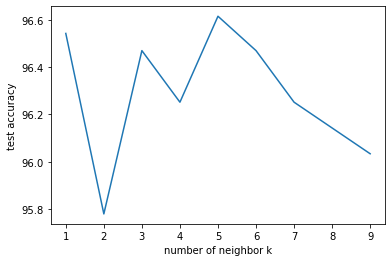

In [52]:
list_k = []
list_acc = []
for k in range(1,10):
    list_k.append(k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print('Accuracy: ',acc,'for k:',k)
vitri = list_acc.index(max(list_acc))
k = list_k[vitri]
print('Select k:', k)
print('')
plt.plot(list_k,list_acc)
plt.xlabel('number of neighbor k')
plt.ylabel('test accuracy')

In [53]:
models = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=k),
    DecisionTreeClassifier(),
    SVC()
]

In [54]:
CV = 10 
cv_data = pd.DataFrame(index=range(CV * len(models)))
cv_entries = []

for model in models: 
    model_name = model.__class__.__name__ 
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    cv_entries.append([model_name, accuracies.mean()])
    
cv_data = pd.DataFrame(cv_entries, columns=['model_name', 'accuracy'])

In [55]:
cv_data.sort_values(by='accuracy',ascending=False)

,model_name,accuracy
1,KNeighborsClassifier,0.962515
3,SVC,0.961241
2,DecisionTreeClassifier,0.899826
0,GaussianNB,0.799744


*Lựa chọn model KNeighborsClassifier*

In [56]:
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred_knn))
print("training score:",model_knn.score(X_train,y_train))
print("test score:",model_knn.score(X_test,y_test))

accuracy: 0.9661572052401747
training score: 0.9731893728011646
test score: 0.9661572052401747


In [57]:
confusion_matrix(y_test,y_pred_knn)

array([[286,   0,   0,   0,   1,   0,   3,   0,   1,   0],
       [  0, 248,  18,   7,   0,   0,   0,   2,   0,   1],
       [  0,   4, 274,   2,   0,   0,   1,   0,   0,   0],
       [  0,   3,   1, 250,   0,   1,   0,   2,   0,   0],
       [  0,   1,   0,   1, 284,   1,   1,   0,   0,   1],
       [  0,   1,   1,   5,   0, 263,   0,   1,   0,   2],
       [  1,   0,   0,   0,   3,   0, 236,   0,   0,   0],
       [  0,   4,   0,   2,   0,   0,   0, 271,   1,   0],
       [  4,   0,   0,   3,   1,   0,   0,   1, 272,   0],
       [  0,   1,   0,   4,   0,   4,   0,   1,   1, 271]], dtype=int64)

<AxesSubplot:>

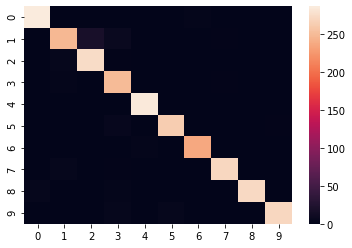

In [58]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn))

In [59]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       291
           1       0.95      0.90      0.92       276
           2       0.93      0.98      0.95       281
           3       0.91      0.97      0.94       257
           4       0.98      0.98      0.98       289
           5       0.98      0.96      0.97       273
           6       0.98      0.98      0.98       240
           7       0.97      0.97      0.97       278
           8       0.99      0.97      0.98       281
           9       0.99      0.96      0.97       282

    accuracy                           0.97      2748
   macro avg       0.97      0.97      0.97      2748
weighted avg       0.97      0.97      0.97      2748



*Model có độ chính xác cao 97%*

*Áp dụng thuật toán PCA*

In [60]:
pca = PCA(.95)

In [61]:
pca.fit(X_train)

PCA(n_components=0.95)

In [62]:
pca.n_components_

11

In [63]:
X_train = pca.transform(X_train)

In [64]:
X_test = pca.transform(X_test)

Accuracy:  95.12372634643377 for k: 1
Accuracy:  94.46870451237264 for k: 2
Accuracy:  95.37845705967976 for k: 3
Accuracy:  95.45123726346434 for k: 4
Accuracy:  95.45123726346434 for k: 5
Accuracy:  95.37845705967976 for k: 6
Accuracy:  95.48762736535662 for k: 7
Accuracy:  95.23289665211063 for k: 8
Accuracy:  95.3056768558952 for k: 9
Select k: 7



Text(0, 0.5, 'test accuracy')

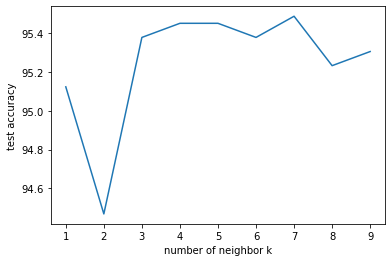

In [65]:
list_k = []
list_acc = []
for k in range(1,10):
    list_k.append(k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print('Accuracy: ',acc,'for k:',k)
vitri = list_acc.index(max(list_acc))
k = list_k[vitri]
print('Select k:', k)
print('')
plt.plot(list_k,list_acc)
plt.xlabel('number of neighbor k')
plt.ylabel('test accuracy')

In [66]:
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
print('accuracy:',accuracy_score(y_test,y_pred_knn))
print("training score:",model_knn.score(X_train,y_train))
print("test score:",model_knn.score(X_test,y_test))

accuracy: 0.9548762736535662
training score: 0.9625136479437099
test score: 0.9548762736535662


*Nhận xét kết quả giữa việc có áp dụng PCA và không áp dụng PCA: Độ chính xác của model bị giảm đi sau khi dùng PCA để giảm chiều dữ liệu --> Không cần sử dụng PCA*